In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
path = 'week8/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name

In [ ]:
img = load_img(fullname, target_size=(299, 299))

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
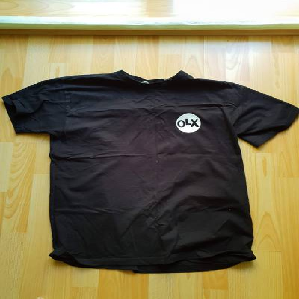

In [ ]:
x = np.array(img)
x

## Pre-trained convolutional neural networks

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
X = np.array([x])

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
decode_predictions(pred, top=5)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

## Transfer Learning
* Reading data with ImageDataGenerator
* Train Xception on smaller images (150*150)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [ ]:
train_ds = train_gen.flow_from_directory(
    "week8/train",
    target_size=(150, 150),
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
ls -l /content/drive/MyDrive/clothing-dataset-small/train

total 40
drwx------ 2 root root 4096 Nov 27 10:54 dress/
drwx------ 2 root root 4096 Nov 27 10:54 hat/
drwx------ 2 root root 4096 Nov 27 10:54 longsleeve/
drwx------ 2 root root 4096 Nov 27 10:54 outwear/
drwx------ 2 root root 4096 Nov 27 10:54 pants/
drwx------ 2 root root 4096 Nov 27 10:54 shirt/
drwx------ 2 root root 4096 Nov 27 10:54 shoes/
drwx------ 2 root root 4096 Nov 27 10:54 shorts/
drwx------ 2 root root 4096 Nov 27 10:54 skirt/
drwx------ 2 root root 4096 Nov 27 10:54 t-shirt/


In [ ]:
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [ ]:
val_ds = val_gen.flow_from_directory(
    "week8/validation",
    target_size=(150, 150),
    batch_size=32)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3)
                      )
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 2034s 20s/step - accuracy: 0.5806 - loss: 1.6439 - val_accuracy: 0.7478 - val_loss: 1.0424
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 196ms/step - accuracy: 0.8289 - loss: 0.5431 - val_accuracy: 0.7419 - val_loss: 1.0953
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.8661 - loss: 0.4063 - val_accuracy: 0.8094 - val_loss: 0.9394
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.9301 - loss: 0.2025 - val_accuracy: 0.7947 - val_loss: 0.9922
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.9491 - loss: 0.1466 - val_accuracy: 0.7771 - val_loss: 0.9488
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.9606 - loss: 0.1175 - val_accuracy: 0.7918 - val_loss: 0.8754
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.9784 - loss: 0.0608 - val_accuracy: 0.7713 - val_loss: 0.9616
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9606 - loss: 0.1078 - val_accuracy: 0.821

In [ ]:
history

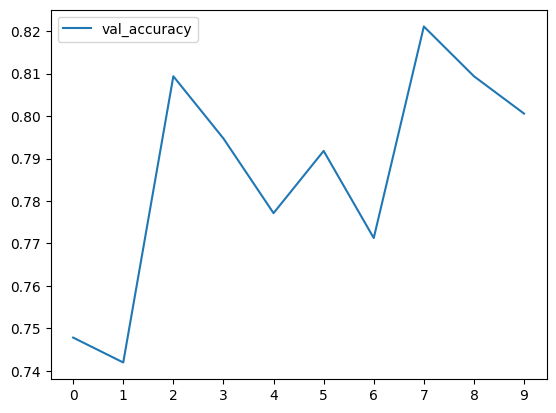

In [ ]:
#plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

### Adjusting the learning rate

In [ ]:
def make_model(learning_rate=0.01):
  base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3)
                      )
  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
scores = {}
for lr in [0.001, 0.01, 0.1]:
  print(f'Learning rate: {lr}')
  model = make_model(lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history['val_accuracy']

  print("\n\n")

In [ ]:
for lr, score in scores.items():
  print(lr, score)

0.001 [0.7653958797454834, 0.803519070148468, 0.8005865216255188, 0.8269794583320618, 0.8093841671943665, 0.8240469098091125, 0.8211143612861633, 0.8093841671943665, 0.8064516186714172, 0.8240469098091125]
0.01 [0.7272727489471436, 0.7947214245796204, 0.7624633312225342, 0.7917888760566711, 0.803519070148468, 0.7536656856536865, 0.8064516186714172, 0.8064516186714172, 0.8181818127632141, 0.8181818127632141]
0.1 [0.7272727489471436, 0.6598240733146667, 0.7390029430389404, 0.7419354915618896, 0.7448680400848389, 0.7536656856536865, 0.7888563275337219, 0.7390029430389404, 0.8005865216255188, 0.7800586223602295]


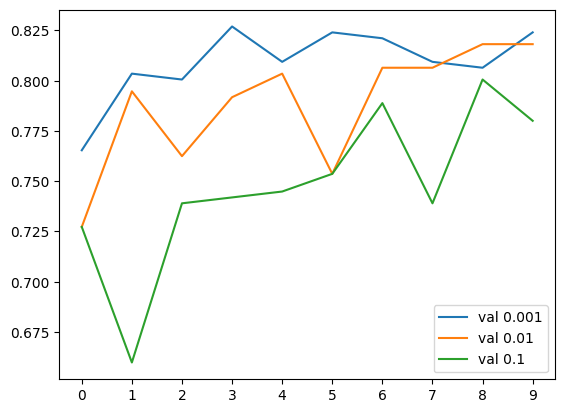

In [ ]:
for lr, score in scores.items():
  plt.plot(score, label=f'val {lr}')

plt.xticks(np.arange(10))
plt.legend()

## Checkpointing
* Saving the best model

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate)

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 244ms/step - accuracy: 0.5071 - loss: 1.5221 - val_accuracy: 0.7683 - val_loss: 0.7128
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.7752 - loss: 0.6590 - val_accuracy: 0.8123 - val_loss: 0.5996
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.8436 - loss: 0.5077 - val_accuracy: 0.8182 - val_loss: 0.5546
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.8768 - loss: 0.4159 - val_accuracy: 0.8123 - val_loss: 0.5485
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.8906 - loss: 0.3729 - val_accuracy: 0.8152 - val_loss: 0.5339
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9100 - loss: 0.3206 - val_accuracy: 0.8065 - val_loss: 0.5608
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.9246 - loss: 0.2765 - val_accuracy: 0.8299 - val_loss: 0.5168
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.9367 - loss: 0.2651 - val_accu

## Adding more layers

In [ ]:
def add_layer_model(learning_rate=0.01, layer=100):
  """Add a layer to the model."""

  base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3)
                      )
  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  dense = keras.layers.Dense(layer, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(dense)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
  print(f'Layer size: {size}')

  model = add_layer_model(learning_rate, size)

  history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds)
  scores[size] = history.history

  print("\n\n")

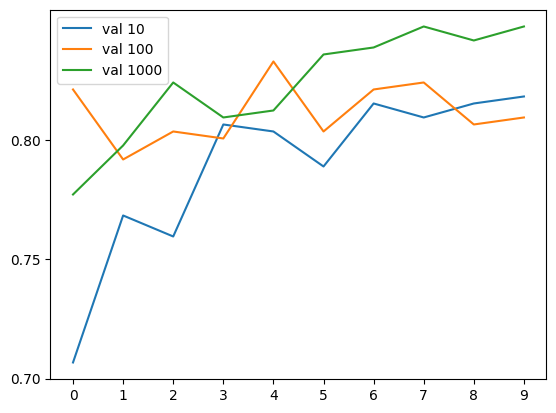

In [ ]:
for size, score in scores.items():
  plt.plot(score['val_accuracy'], label=f'val {size}')

plt.xticks(np.arange(10))
plt.yticks(np.arange(0.7, 0.84, 0.05))
plt.legend()

## Regularization and dropout

In [ ]:
def make_model(learning_rate=0.01, layer=1000, droprate=0.5):
  base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3)
                      )
  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  dense = keras.layers.Dense(layer, activation='relu')(vectors)

  dropout = keras.layers.Dropout(droprate)(dense)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
learning_rate = 0.001
layer = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(f'Dropout rate: {droprate}')
  model = make_model(learning_rate, size, droprate)

  history = model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds)
  scores[droprate] = history.history

  print("\n\n")

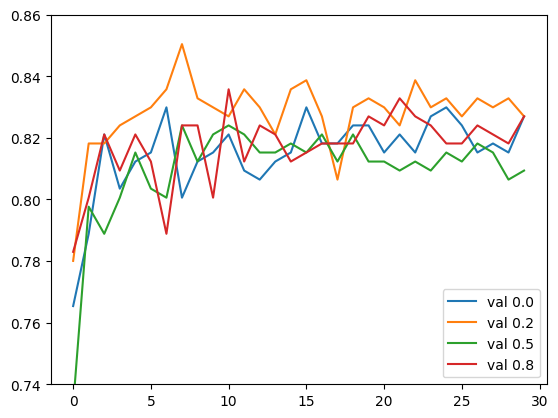

In [ ]:
for droprate, score in scores.items():
  plt.plot(score['val_accuracy'], label=f'val {droprate}')

plt.legend()
plt.ylim(0.74, 0.86)
plt.show()

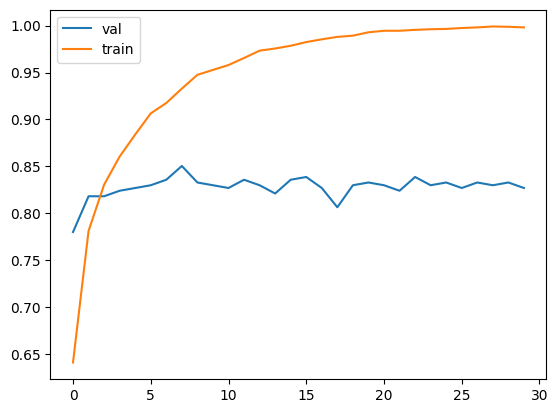

In [ ]:
hist = scores[0.2]

plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()
plt.show()

## Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=1.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    "week8/train",
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "week8/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate=0.001
size=100
droprate=0.2

model = make_model(learning_rate, size, droprate)

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds)

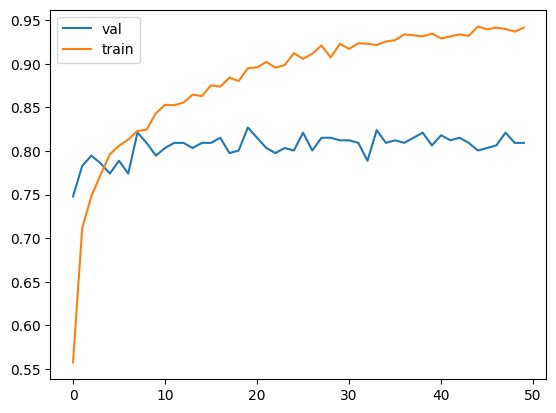

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()
plt.show()

### Training a larger model

In [ ]:
def make_model(input_size=150,learning_rate=0.01, layer=1000, droprate=0.5):
  base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(input_size, input_size, 3)
                      )
  base_model.trainable = False

  inputs = keras.Input(shape=(input_size,input_size,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  dense = keras.layers.Dense(layer, activation='relu')(vectors)

  dropout = keras.layers.Dropout(droprate)(dense)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=1.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    "week8/train",
    target_size=(299, 299),
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "week8/validation",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate=0.001
size=100
droprate=0.2
input_size=299

model = make_model(input_size, learning_rate, size, droprate)

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 2873s 28s/step - accuracy: 0.4837 - loss: 1.6326 - val_accuracy: 0.7889 - val_loss: 0.7119
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 802ms/step - accuracy: 0.7589 - loss: 0.8043 - val_accuracy: 0.8270 - val_loss: 0.5634
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 792ms/step - accuracy: 0.7964 - loss: 0.6480 - val_accuracy: 0.8328 - val_loss: 0.5042
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 805ms/step - accuracy: 0.8208 - loss: 0.5750 - val_accuracy: 0.8475 - val_loss: 0.4743
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 140s 776ms/step - accuracy: 0.8447 - loss: 0.5189 - val_accuracy: 0.8416 - val_loss: 0.4488
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 788ms/step - accuracy: 0.8480 - loss: 0.5011 - val_accuracy: 0.8328 - val_loss: 0.4579
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 808ms/step - accuracy: 0.8484 - loss: 0.4680 - val_accuracy: 0.8416 - val_loss: 0.4398
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 811ms/step - accuracy: 0.8709 - loss: 0.4182 - val_accuracy: 0.84

### Using the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import numpy as np

In [ ]:
model = keras.models.load_model('../models/xception_v1_46_0.874.keras')

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "week8/test",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False)

Found 372 images belonging to 10 classes.


In [ ]:
model.evaluate(test_ds)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 296s 25s/step - accuracy: 0.8485 - loss: 0.3698


[0.2974105179309845, 0.8870967626571655]

In [1]:
path = 'week8/test/hat/6c2f18d0-30ff-468c-a470-39c65abf4851.jpg'

In [ ]:
img = load_img(path, target_size=(299,299))

In [ ]:
X = np.array([img])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
pred

array([[ -4.630449  ,  -0.23603374,  -7.670627  ,  -7.5156713 ,
         -4.963184  ,  -7.1589794 ,  -8.884153  , -10.262727  ,
         -9.566102  ,  -6.091596  ]], dtype=float32)

In [ ]:
class_idx = test_ds.class_indices
classes = list(class_idx.keys())

In [ ]:
dict(zip(classes, pred[0]))

{'dress': -4.630449,
 'hat': -0.23603374,
 'longsleeve': -7.670627,
 'outwear': -7.5156713,
 'pants': -4.963184,
 'shirt': -7.1589794,
 'shoes': -8.884153,
 'shorts': -10.262727,
 'skirt': -9.566102,
 't-shirt': -6.091596}